In [58]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import pandas as pd
import scipy.stats as stats

In [2]:
stats.binom.pmf(6, n=9, p=0.5)

0.16406250000000003

In [4]:
p_grid = np.linspace(0, 1, 5)

In [10]:
# define prior
prior = np.repeat(1, 5)  # uniform

In [12]:
likelihood = stats.binom.pmf(6, 9, p_grid)

In [15]:
unstd_posterior = likelihood * prior

In [16]:
posterior = unstd_posterior / unstd_posterior.sum()

In [19]:
def posterior_grid_approx(grid_points=5, success=6, tosses=9):
    """"""
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

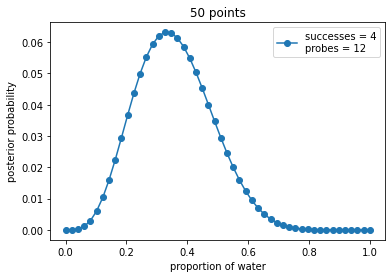

In [50]:
grid_points = 50
w = 4
n = 12
p_grid, posterior = posterior_grid_approx(grid_points,w,n)

plt.plot(p_grid,posterior,  "o-", label=f"successes = {w}\nprobes = {n}")
plt.xlabel("proportion of water")
plt.ylabel("posterior probability")
plt.title(f"{grid_points} points")
plt.legend(loc=0)
plt.show()

In [51]:
with pm.Model() as probe_model:
    p = pm.Uniform("p", 0, 1)  # uniform priors
    
    w = pm.Binomial("w", n=n, p=p, observed=w)  # binomial likelihood

In [52]:
with probe_model:
    mean_q = pm.find_MAP()
    std_q = ((1 / np.diag(pm.find_hessian(mean_q, vars=[p]))) ** 0.5)[0]
print(mean_q["p"],std_q)



0.33333333283475775 0.13608276338618303


In [53]:
with probe_model:
    samples = pm.sample(1000, tune=1000)
    

C:\Users\edsea\AppData\Local\Temp/ipykernel_13464/917549350.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  samples = pm.sample(1000, tune=1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 54 seconds.


In [54]:
az.summary(samples, round_to=2, kind="stats")

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\edsea\miniconda3\envs\stat-rethink2\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%
p,0.36,0.13,0.13,0.59


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\edsea\miniconda3\envs\stat-rethink2\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

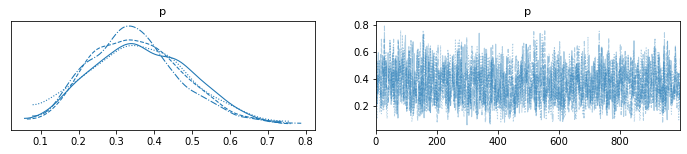

In [55]:
az.plot_trace(samples)

In [56]:
# Linear regression

In [59]:
d = pd.read_csv("Data/Howell1.csv", sep=";", header=0)

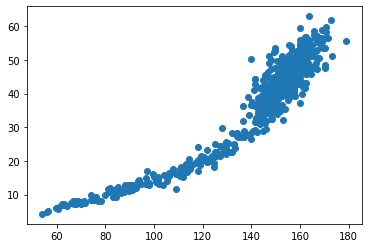

In [62]:
plt.scatter(d.height,d.weight)

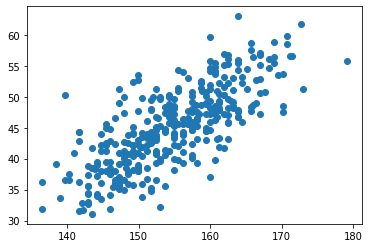

In [64]:
d_ad = d[d.age>=18]
plt.scatter(d_ad.height, d_ad.weight)

In [66]:
with pm.Model() as av_height:
    mu = pm.Normal("mu", mu=173, sd=20)
    sigma = pm.Uniform("sigma", lower=0, upper=50)
    
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d_ad.height)

In [67]:
with av_height:
    samples = pm.sample(1000, tune=1000)

C:\Users\edsea\AppData\Local\Temp/ipykernel_13464/1057481392.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  samples = pm.sample(1000, tune=1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 145 seconds.
The acceptance probability does not match the target. It is 0.8845585408554496, but should be close to 0.8. Try to increase the number of tuning steps.


In [69]:
az.summary(samples, round_to=2, kind="stats")

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\edsea\miniconda3\envs\stat-rethink2\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%
mu,154.60,0.42,153.81,155.38
sigma,7.77,0.30,7.24,8.33


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\edsea\miniconda3\envs\stat-rethink2\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

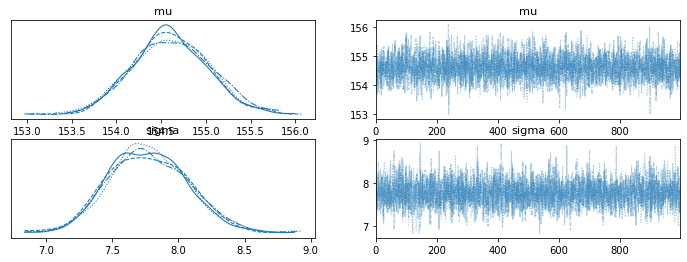

In [70]:
az.plot_trace(samples)

In [73]:
xbar = d_ad.weight.mean()
with pm.Model() as height_weight:
    a = pm.Normal("a", mu=173, sd=20)
    b = pm.Lognormal("b", mu=0, sd=1)
    sigma = pm.Uniform("sigma", 0, 50)
    
    mu = a + b * (d_ad.weight - xbar)
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d_ad.height)
    trace_height_weight = pm.sample(1000, tune=1000)

C:\Users\edsea\AppData\Local\Temp/ipykernel_13464/3339601805.py:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_height_weight = pm.sample(1000, tune=1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 96 seconds.


In [75]:
az.summary(trace_height_weight, kind="stats")

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\edsea\miniconda3\envs\stat-rethink2\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%
a,154.600,0.276,154.091,155.101
b,0.904,0.042,0.820,0.977
sigma,5.103,0.198,4.728,5.453


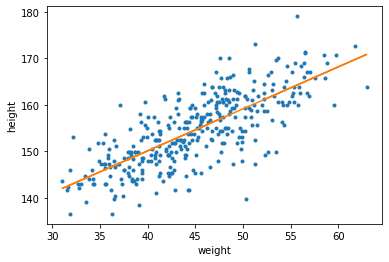

In [84]:
plt.plot(d_ad.weight, d_ad.height, ".")
alpha = trace_height_weight["a"].mean()
beta = trace_height_weight["b"].mean()
centered_weight = (d_ad.weight - xbar)
plt.plot(d_ad.weight,  alpha +  beta*centered_weight )
plt.xlabel(d_ad.columns[1])
plt.ylabel(d_ad.columns[0]);

In [86]:
cd "C:\Users\edsea\My Drive\Backup\UM6P\Data Science 2 class\DatSci2_2022_repo"

C:\Users\edsea\My Drive\Backup\UM6P\Data Science 2 class\DatSci2_2022_repo


In [88]:
execfile("quap.txt")

ModuleNotFoundError: No module named 'tensorflow'